# WeatherPy

## Analysis
- The highest temperature (100F) happens at latitude 0, it's a beautiful curve. the farer from latitude 0, the lower of max tempture.
- There is no significant relationship between latitude and cloudiness.
- Even though we see some cities with lower humidity and higher wind speed between latitude 0~40, we still can find a tred to show a significant relationship.

In [7]:
import requests as req
import json
import datetime
import random
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from citipy import citipy

# Generate Cities List

In [35]:
filename = 'apikey.txt'

In [36]:
def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

In [8]:
# Set up the Link
api_key = get_file_contents(filename)
url = 'http://api.openweathermap.org/data/2.5/weather?'
unit = 'Imperial'
Link = url + 'appid=' + api_key + '&units=' + unit + '&q='

# Generate lists of latitude and longtitude
lats = np.random.uniform(-90, 90, 3000)
lngs = np.random.uniform(-180, 180, 3000)

# Find the nearest city by citipy and then clean and shuffle the data
coords = []
cities = []
weather_data = []
for i in range(len(lats)):
    x = (lats[i], lngs[i])
    coords.append(x)
    city = citipy.nearest_city(x[0],x[1]).city_name
    cities.append(city)
    cities = list(set(cities))
    random.shuffle(cities)
len(cities)

971

In [9]:
# Create a function to get data from openweathermap, and filter out the cities which are not in the database
def city_query(sample_cities):
    for j in sample_cities:
        response = req.get(Link + j).json()
        if response['cod'] != '404':
            weather_data.append(response)
    return weather_data

# Create a timer to avoid exceeding limit per minute
all_cities = []
count = 0

for i in range(0, len(cities), 20):
    epoch = cities[i:i+20]
    all_cities += city_query(epoch)  
    count += 1
    print(count)
    print(len(all_cities))
    if len(all_cities) > 500:
        break
    time.sleep(120)
print('end')

1
19
2
55
3
110
4
183
5
273
6
380
7
506
end


In [38]:
# Get the data from json
Name = [data['name'] for data in all_cities]
Humidity = [data['main']['humidity'] for data in all_cities]
Lat = [data['coord']['lat'] for data in all_cities]
Lon = [data['coord']['lon'] for data in all_cities]
Cloudiness = [data['clouds']['all'] for data in all_cities]
Wind_Speed = [data['wind']['speed'] for data in all_cities]
Country = [data['sys']['country'] for data in all_cities]
Max_Temp = [data['main']['temp_max'] for data in all_cities]
Date = [data['dt'] for data in all_cities]

# Create a DataFrame
Weather_df = pd.DataFrame({'City':Name,
              'Cloudiness':Cloudiness,
              'Country':Country,
              'Date':Date,
              'Humidity':Humidity,
              'Lat':Lat,
              'Lng':Lon,
              'Max Temp':Max_Temp,
              'Wind Speed':Wind_Speed
             })
Weather_df.count()

City          506
Cloudiness    506
Country       506
Date          506
Humidity      506
Lat           506
Lng           506
Max Temp      506
Wind Speed    506
dtype: int64

In [39]:
# Show DataFrame
Weather_df.to_csv('city_data.csv')
Weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sri Aman,90,MY,1514062800,94,1.24,111.46,75.20,0.81
1,Labuhan,44,ID,1514066819,91,-2.54,115.51,74.87,3.60
2,Portland,75,US,1514065980,60,45.52,-122.67,41.00,20.80
3,Ocos,20,GT,1514062800,41,14.51,-92.19,93.20,9.17
4,Halifax,90,CA,1514064600,100,44.65,-63.58,37.40,19.46


In [40]:
# Transfer the date to readable format
data_date = time.strftime('(%m/%d/%y)', time.localtime(Weather_df['Date'][0]))

# Latitude vs Temperature Plot

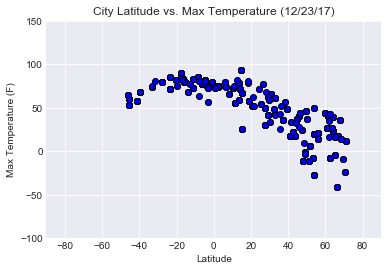

In [42]:
# Create a scatter plot to show latitude and max temperature
plt.scatter(Weather_df['Lat'], Weather_df['Max Temp'] , marker='o', color='b', edgecolors='black')
plt.title('City Latitude vs. Max Temperature {}'.format(data_date))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.style.use('seaborn-darkgrid')
plt.xlim(-90, 90)
plt.ylim(-100, 150)

# Save Figure
plt.savefig("analysis/Fig1.png")

# Show Figure
plt.show()

# Latitude vs. Humidity Plot

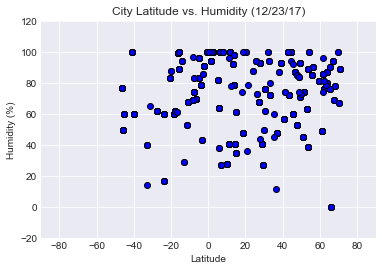

In [43]:
# Create a scatter plot to show latitude and humidity
plt.scatter(Weather_df['Lat'], Weather_df['Humidity'] , marker='o', color='b', edgecolors='black')
plt.title('City Latitude vs. Humidity {}'.format(data_date))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.style.use('seaborn-darkgrid')
plt.xlim(-90, 90)
plt.ylim(-20, 120)

# Save Figure
plt.savefig("analysis/Fig2.png")

# Show Figure
plt.show()

# Latitude vs. Cloudiness Plot

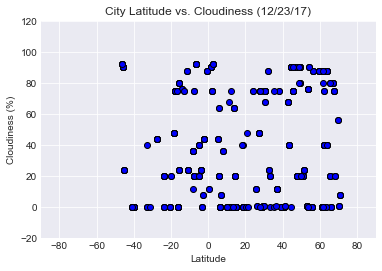

In [44]:
# Create a scatter plot to show latitude and cloudiness
plt.scatter(Weather_df['Lat'], Weather_df['Cloudiness'] , marker='o', color='b', edgecolors='black')
plt.title('City Latitude vs. Cloudiness {}'.format(data_date))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.style.use('seaborn-darkgrid')
plt.xlim(-90, 90)
plt.ylim(-20, 120)

# Save Figure
plt.savefig("analysis/Fig3.png")

# Show Figure
plt.show()

# Latitude vs. Wind Speed Plot

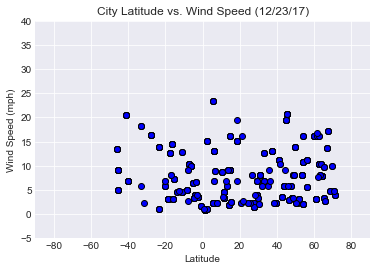

In [45]:
# Create a scatter plot to show latitude and max wind speed
plt.scatter(Weather_df['Lat'], Weather_df['Wind Speed'] , marker='o', color='b', edgecolors='black')
plt.title('City Latitude vs. Wind Speed {}'.format(data_date))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.style.use('seaborn-darkgrid')
plt.xlim(-90, 90)
plt.ylim(-5, 40)

# Save Figure
plt.savefig("analysis/Fig4.png")

# Show Figure
plt.show()